<a href="https://colab.research.google.com/github/AnishaBeck/ML/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries  
import numpy as nm  
import matplotlib.pyplot as ply  
import pandas as pd 

In [ ]:
#importing dataset
data = pd.read_csv("/content/goals.csv")

In [ ]:
data.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


Extracting the matrix features:

In [ ]:
x = data.loc[:,['goals','match_played']].values

In [ ]:
print(x)

**Finding the optimal number of clusters using Dendrogram** 

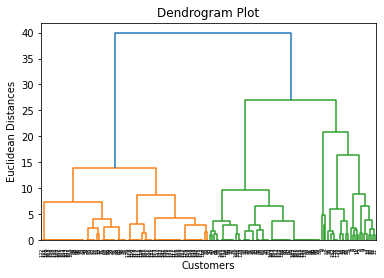

In [ ]:
import scipy.cluster.hierarchy as sch
dendo = sch.dendrogram(sch.linkage(x, method = 'ward'))

ply.title("Dendrogram Plot")
ply.ylabel("Euclidean Distances")
ply.xlabel("Customers")
ply.show()

In the above diagram, we see that the vertical distances that are not cutting their horizontal bars. According to this, the number of clusters will be 6(the vertical lines in this range).

**So, the optimal number of clusters will be 6**, and we will train the model in the next step, using the same.

In [ ]:
from scipy.spatial.distance import euclidean
#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters= 6, affinity="euclidean", linkage = "ward")

In [ ]:
y_pred =  hc.fit_predict(x)

The AgglomerativeClustering class takes the following parameters:


1. **n_clusters**=6: It defines the number of clusters, and we have taken here 5 because it is the optimal number of clusters.

2. **affinity**='euclidean': It is a metric used to compute the linkage.

3. linkage='ward': It defines the linkage criteria, here we have used the "ward" linkage. This method is the popular linkage method that we have already used for creating the Dendrogram. It reduces the variance in each cluster.

In the last line, we have created the dependent variable y_pred to fit or train the model. It does train not only the model but also returns the clusters to which each data point belongs. 

In [ ]:
print(y_pred)

[3 3 3 1 1 1 1 1 1 1 1 1 4 1 1 1 5 5 4 4 1 1 5 5 5 5 0 4 4 5 0 0 5 0 0 5 4
 0 0 0 0 2 0 5 0 5 5 5 0 0 2 4 0 0 0 5 4 0 5 5 5 0 0 5 2 0 5 5 5 5 0 5 0 5
 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 4 0 0 0 5 2 2 0 5 2 4 0 0 0 0 0 5 2 2 2 2 2 2 2 2 2
 2 2 2 2 4 0 0 0 5 2 2 2 0 0 0 0 0 0 0 0 5 5 5 5 5 2 2 2 2 2 2 2 2 2 0]


The y_pred shows the clusters value, which means the player id 1 belongs to the 4th cluster (as indexing starts from 0, so 3 means 4th cluster), the player id 4 belongs to 2nd cluster, and so on.

**Visualizing the clusters**

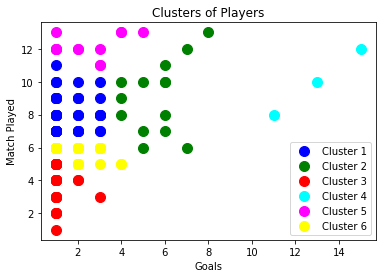

In [ ]:
#visulaizing the clusters  
ply.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
ply.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
ply.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
ply.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
ply.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
ply.scatter(x[y_pred == 5, 0], x[y_pred == 5, 1], s = 100, c='yellow', label = 'Cluster 6')  
ply.title('Clusters of Players')  
ply.xlabel('Goals')  
ply.ylabel('Match Played')  
ply.legend()  
ply.show()  

**Hierarchical Clustering over k-Mean Clustering**

**Advantages**	
• Hierarchical	clustering	outputs	a	hierarchy,	ie	a	structure	that	is	more	informative	than the	unstructured	set	of	flat	clusters	returned	by	k-means.	Therefore,	it	is	easier	to	decide on	the	number	of	clusters	by	looking	at	the	dendrogram		


Disavantages	
• It	is	not	possible	to	undo	the	previous	step:	once	the	instances	have	been	assigned	to	a cluster,	they	can	no	longer	be	moved	around.		
• Time	complexity:	not	suitable	for	large	datasets	
• Initial	seeds	have	a	strong	impact	on	the	final	results	
• The	order	of	the	data	has	an	impact	on	the	final	results	
• Very	sensitive	to	outliers